In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, make_scorer

from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv('df_finally_without_bad.csv', index_col=0)

In [3]:
X = df[df.columns[:-1]]
y = df['Diagnosis']

In [4]:
max_depth = [2,3,4,5,6]
min_samples_split = [2,3,4,5,6]
min_samples_leaf = [1,2,3]

parameters = dict(dec_tree__max_depth=max_depth,
                  dec_tree__min_samples_split=min_samples_split,
                  dec_tree__min_samples_leaf=min_samples_leaf)

f1_score_macro = make_scorer(f1_score, average='macro')

In [5]:
dec_tree = tree.DecisionTreeClassifier(random_state=0, criterion='gini')
pipe = Pipeline(steps=[('dec_tree', dec_tree)])

clf_GS = GridSearchCV(pipe, parameters, scoring=f1_score_macro, cv=5)
clf_GS.fit(X, y)

print('Best max_depth:', clf_GS.best_estimator_.get_params()['dec_tree__max_depth'])
print('Best min_samples_split:', clf_GS.best_estimator_.get_params()['dec_tree__min_samples_split'])
print('Best min_samples_leaf:', clf_GS.best_estimator_.get_params()['dec_tree__min_samples_leaf'])
print(); print(clf_GS.best_estimator_.get_params()['dec_tree'])

Best max_depth: 2
Best min_samples_split: 2
Best min_samples_leaf: 1

DecisionTreeClassifier(max_depth=2, random_state=0)


In [6]:
clf = DecisionTreeClassifier(random_state=0, max_depth=2, min_samples_leaf=1, min_samples_split=2, criterion='gini')
clf = clf.fit(X, y)
y_pred = clf.predict(X)
dit = {'healthy': 0, 'sick': 1}
y_ = list(map(lambda x: dit[x], y))
y_pred_ = list(map(lambda x: dit[x], y_pred))
f1_score(y_, y_pred_, average='macro')*100

78.88707037643208

In [8]:
X.rename(columns={"s3.q12": "Do you experience or have you experienced in the past 3 months pain in the temporomandibular joints (located in front of your ears) or in their vicinity?",
                  "s3.q12_1__answers.s3.q12_1.idk": "Don't you know on which side?",
                  "s3.q11_2__answers.s3.q11_2.click": "Do you experience click sounds during jaw movements?"}, inplace=True)

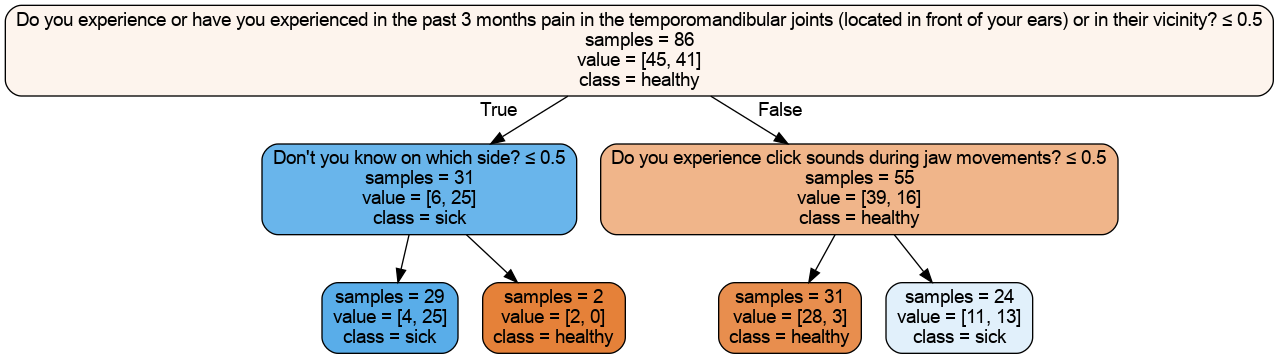

In [9]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus

feature_cols = X.columns
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data, impurity=False,
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['healthy','sick'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

# PERSONALITIES

In [7]:
cor = X[['O','C','E','A','N']]
cor['Diagnosis'] = y_

In [11]:
import seaborn as sns

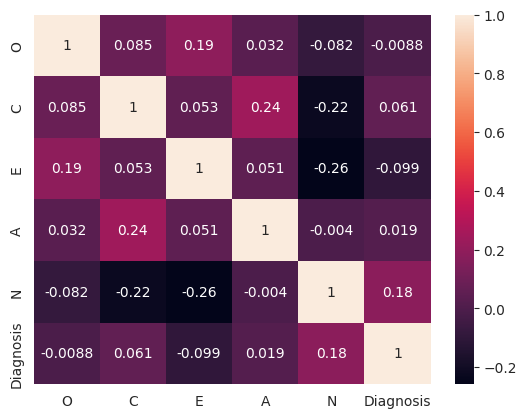

In [12]:
sns_plot = sns.heatmap(cor.corr(), annot=True)
fig = sns_plot.get_figure()
fig.savefig("corr.png")